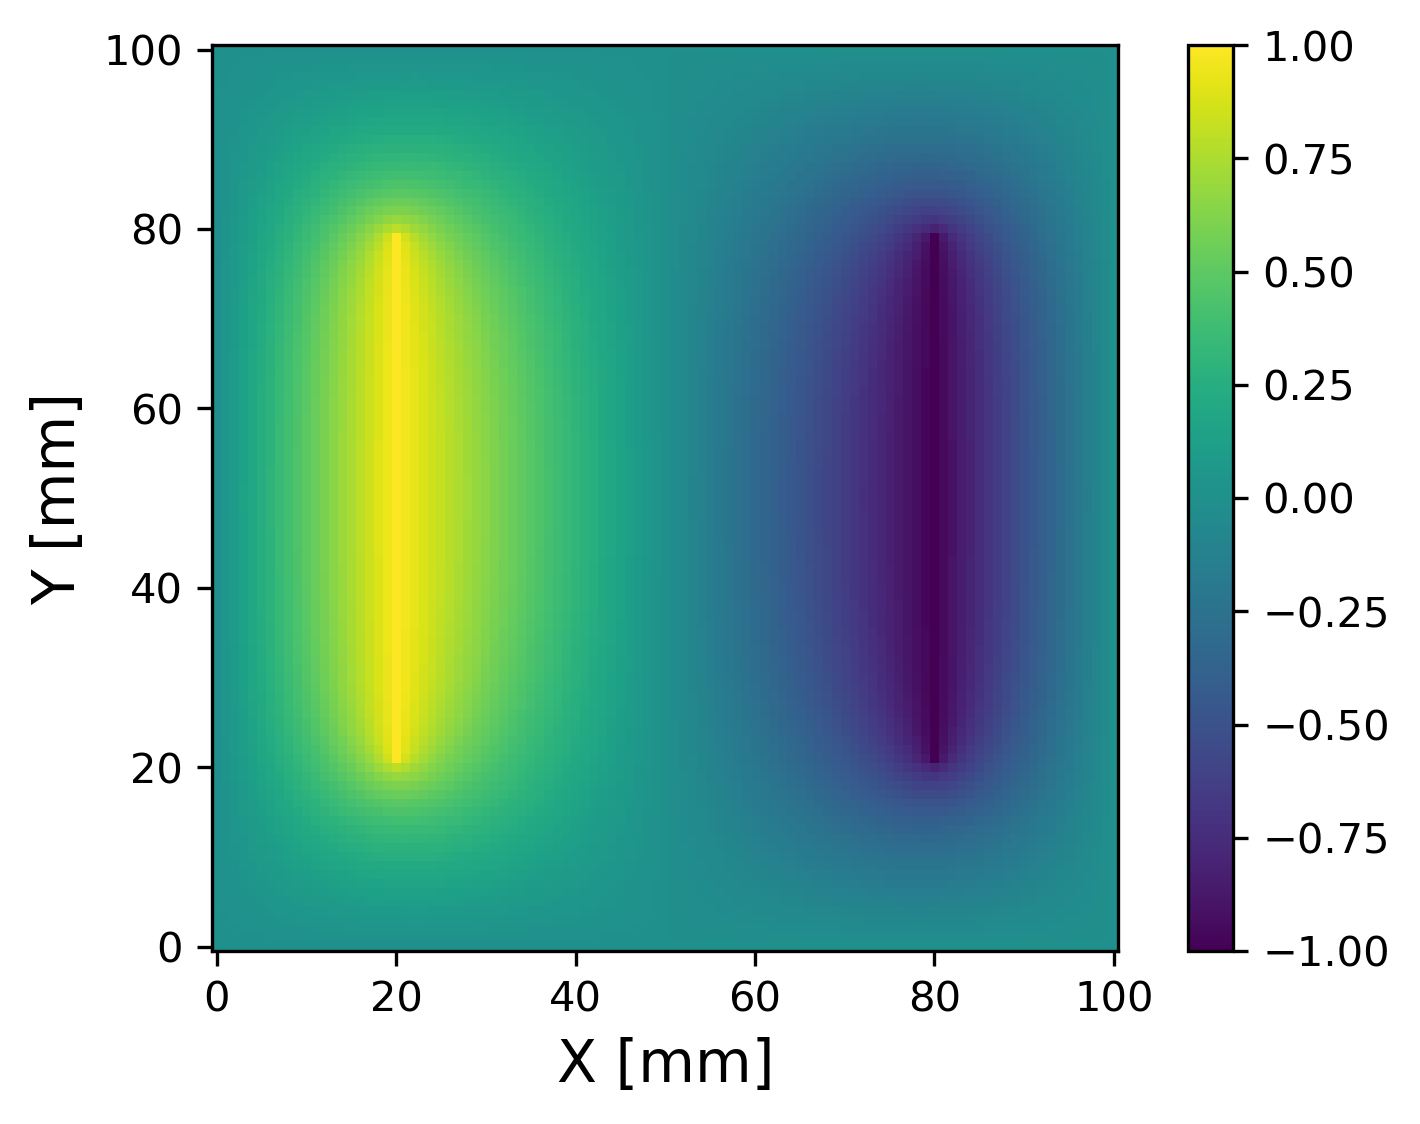

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''
Programa capaz de resolver a equação de Laplace utilizando
o método de Gauss-Seidel combinado com 'overrelaxation'.
Para esse problema estamos resolvendo o potencial de duas
placas paralelas finitas. As condições de contorno são:
V = 0 em todas as paredes - representação do ponto no
infinito - e V = +- 1V nas placas. As dimensões são
explicitadas no código.
'''
#Parâmetros
N   = 100       # Dimensão do grid
V0  = 1.0       #[V] Módulo da voltagem nas placas
err = 1e-6      #[V] Precisão do cálculo da voltagem

#Array para armazenamento do potencial 
phi = np.zeros([N+1,N+1],float)

# delta: Parâmetro para convergência
# w:     Constante do método de overrelaxation
delta = 1.0
w     = 0.9

while delta > err:
    delta = 0
    for i in range(1,N):
        for j in range(1,N):
            # Condição de contorno na placa da esquerda
            if j == 20 and i > 20 and  i < 80:
                phi[i,j] = V0
            # Condição de contorno na placa da direita
            elif j == 80 and i > 20 and  i < 80:
                phi[i,j] = -V0
            else:
                delta_phi = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
                phi[i,j]  = phi[i,j] + (1 + w)*delta_phi
             
            # Certificando que todos os pontos converjam
            if delta_phi > delta: 
                delta = delta_phi
# Make a plot
plt.figure(dpi = 300)
plt.imshow(phi, origin = 'lower')
plt.xlabel("X [mm]", size = 14)
plt.ylabel('Y [mm]', size = 14)
plt.colorbar()
plt.savefig('ex9_3_img1')
plt.show()